In [2]:
from __future__ import division, print_function
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

from disparity import block_matching
from disparity import CRF

# Load the L & R images

In [3]:
# load left and right images
img_L = Image.open('../data/test/tsukuba_L.png').convert('L')
img_R = Image.open('../data/test/tsukuba_R.png').convert('L')
# convert to float, range 0-1
img_L = np.asarray(img_L, dtype=np.float32) / 255.
img_R = np.asarray(img_R, dtype=np.float32) / 255.

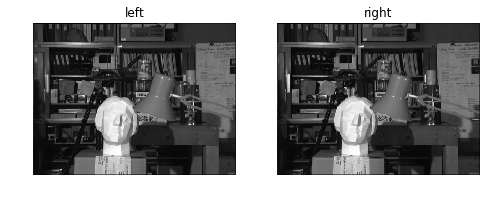

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(img_L, cmap='gray')
axes[0].set_title('left')
axes[0].axis('off')
axes[1].imshow(img_R, cmap='gray')
axes[1].set_title('right')
axes[1].axis('off')
plt.show()

# Compute initial disparity via block matching

In [5]:
disparity = block_matching.compute_disparity(img_L, img_R, numDisparities=16, blockSize=5)

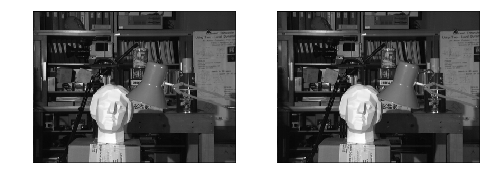

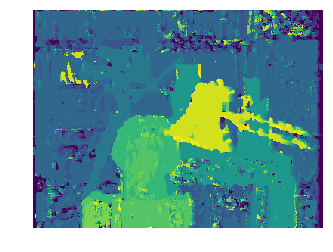

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].imshow(img_R, cmap='gray')
axes[0].axis('off')
axes[1].imshow(img_L, cmap='gray')
axes[1].axis('off')
plt.show()

plt.figure()
plt.imshow(disparity)
plt.axis('off')
plt.show()

# CRF smoothing

In [14]:
disparity_p, losses = CRF.decode(
    disparity, alpha=80., beta=1.5,
    lr=0.01, iterations=500
)

100%|██████████| 500/500 [00:05<00:00, 88.39it/s]


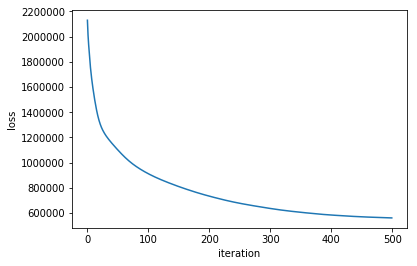

In [15]:
plt.figure(figsize=(6,4))
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

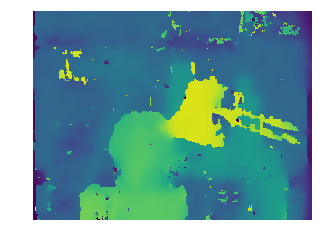

In [16]:
plt.figure(figsize=(5,4))
plt.imshow(disparity_p)
plt.axis('off')
plt.show()